# Supermarket Sales Data Analysis

## Introduction

In the competitive retail environment, understanding sales dynamics and customer behavior is essential for driving growth and profitability. This project focuses on analyzing a comprehensive dataset from a supermarket to uncover key insights into sales performance, customer demographics and product preferences.

The dataset captures detailed transaction-level information, including the branch location, customer type, gender, product categories, unit prices, quantities sold and payment methods. Additionally, it includes financial metrics such as tax, cost of goods sold (COGS), gross margin and gross income. Analyzing this data provides an opportunity to explore trends, patterns, and correlations that can inform data-driven decisions.

The objectives of this analysis are to:

1. Sales Trends Analysis:

    Identify and analyze trends in sales over time across different branches and cities.
    Determine peak sales periods (days, months) and the factors influencing these peaks.
    Evaluate the contribution of each branch and city to the overall sales.

2. Product Line Performance:

    Assess the performance of different product lines based on total sales and quantities sold.
    Identify the top-performing and underperforming product lines.
    Explore customer preferences across different product categories.

3. Customer Demographics and Behavior:

    Analyze customer demographics (e.g., gender, customer type) to understand purchasing patterns.
    Investigate the relationship between customer demographics and product preferences.
    Determine which customer segments contribute the most to sales and revenue.

4. Payment Methods Analysis:

    Examine the distribution and popularity of different payment methods.
    Identify any correlations between payment methods and customer demographics or purchase amounts.
    Assess the impact of payment methods on overall sales and customer satisfaction.

5. Gross Margin and Profitability:

    Calculate and analyze gross margins across product lines and branches.
    Identify high-margin products and potential areas for improving profitability.
    Explore the relationship between gross income, COGS, and other financial metrics.

6. Correlation and Factor Analysis:

    Explore correlations between key variables (e.g., product line, unit price, quantity, rating) to uncover hidden patterns.
    Identify factors that most strongly influence customer satisfaction (as indicated by ratings).
    Investigate any potential relationships between sales performance and other business metrics.

Using Python’s powerful data analysis libraries, we will perform an in-depth exploratory data analysis (EDA) to visualize and interpret the data. The insights gained will not only help optimize the supermarket’s operations but also enhance customer satisfaction by tailoring strategies to meet their needs more effectively.

This analysis is structured to provide clear, actionable insights that can guide strategic decisions in retail management, product offerings and customer engagement.


### 1. Loading the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ingnoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  


/home/chemweno/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Loading the dataset

In [3]:
df = pd.read_csv('supermarket_sales.csv')

#Displaying the first 5 rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 3. Data Cleaning and Wrangling

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [5]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [6]:
#Checking the data types of the columns
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [7]:
#Converting the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

#Converting the 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

#Confirming the changes
print(df.dtypes)

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


/tmp/ipykernel_143760/2720177592.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [8]:
#Checking for unique values
unique_values = df.nunique()
print(unique_values)

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64


Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')


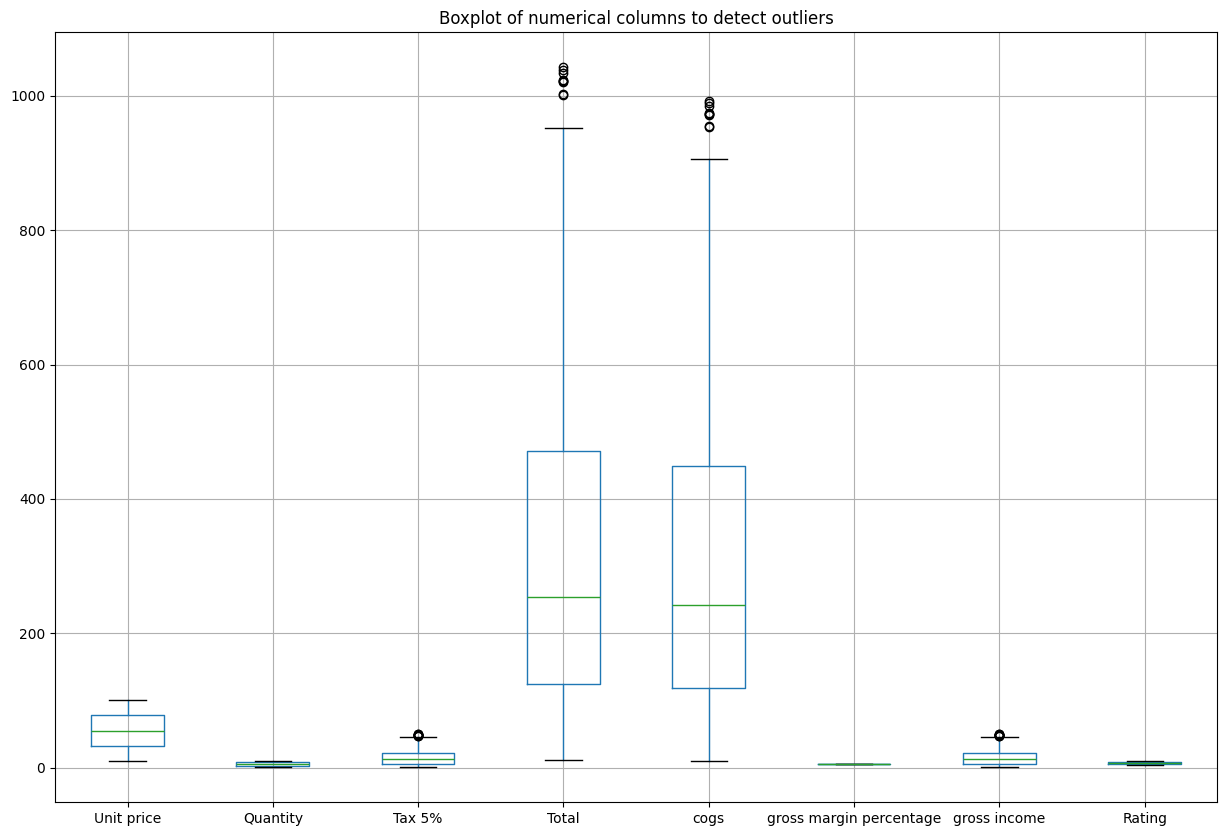

In [9]:
#Plotting boxplots to detect outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(numerical_columns)

df[numerical_columns].boxplot(figsize=(15, 10))
plt.title('Boxplot of numerical columns to detect outliers')
plt.show()  

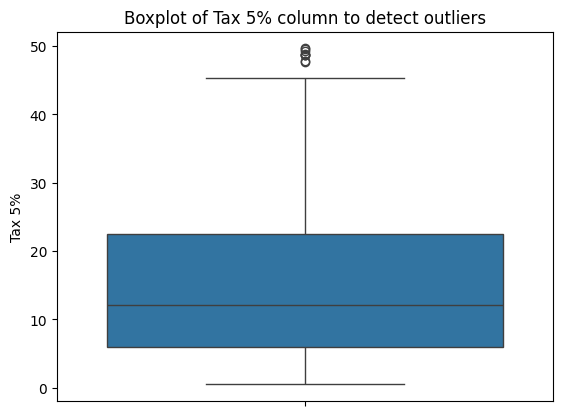

In [10]:
#Checking for outliers in the 'Tax 5%' column
sns.boxplot(df['Tax 5%'])
plt.title('Boxplot of Tax 5% column to detect outliers')
plt.show()  

In [11]:
# Check the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

### 4. Data Visualizations

#### Sales Trend over Time


In [12]:
#Extracting the Month and Day from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-08-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-08-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-08-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-08-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-08-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,8


##### Monthly sales trend

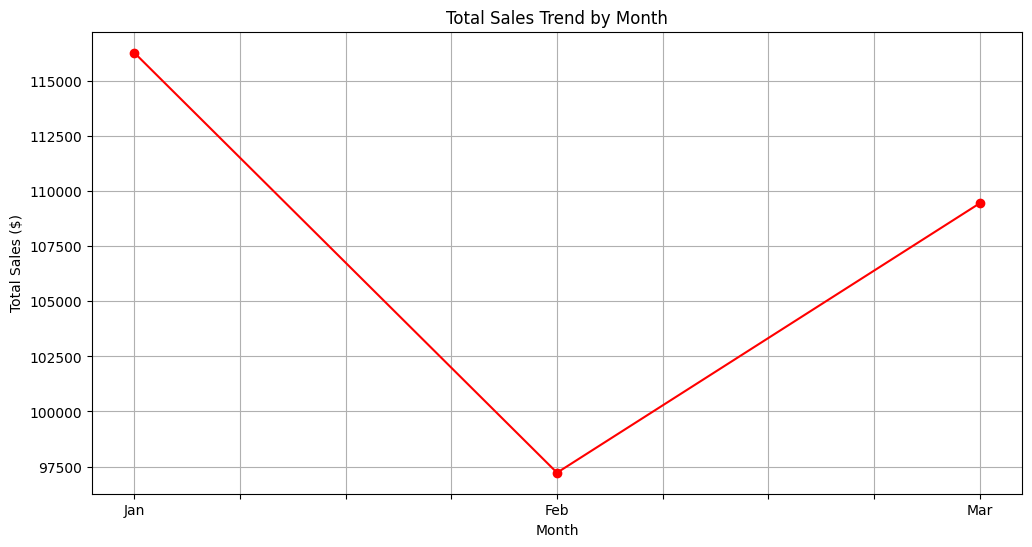

In [13]:
# Define a mapping from month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar'}

# Aggregating Sales by Month
monthly_sales = df.groupby('Month')['Total'].sum()

# Map the month numbers to month names for the x-axis labels
monthly_sales.index = monthly_sales.index.map(month_names)

# Plotting the total sales trend by month
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='r')
plt.title('Total Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')

# Formatting the y-axis to show values in thousands
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e3)}k'))

plt.grid(True)
plt.show()

##### Daily sales trend

The day with the most sales is Day 15 with total sales of $15717.460500000001
The day with the least sales is Day 31 with total sales of $5232.4965


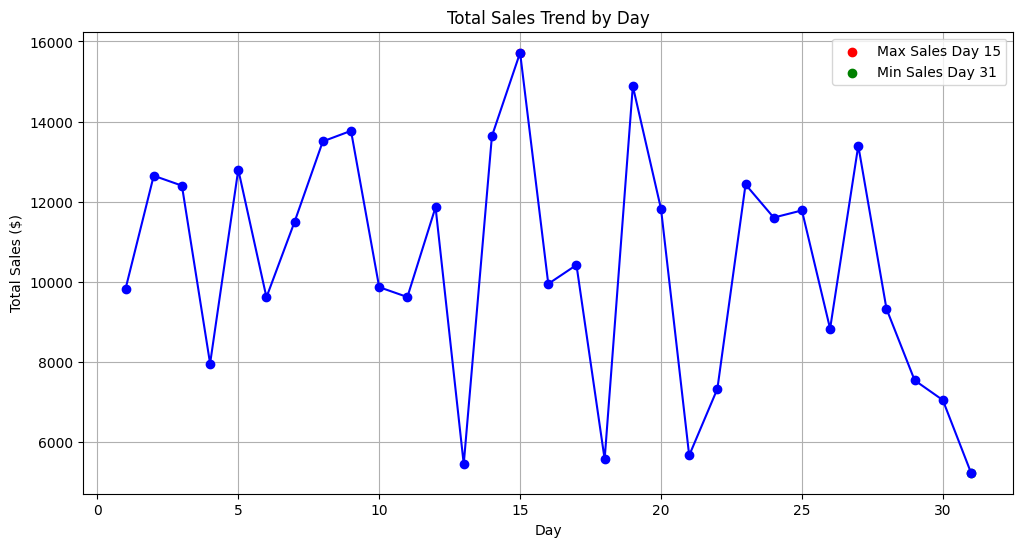

In [14]:
# Aggregate sales by Day
daily_sales = df.groupby('Day')['Total'].sum()

# Finding the day with most sales
max_sales_day = daily_sales.idxmax()

# Finding the day with least sales
min_sales_day = daily_sales.idxmin()

# Plotting the total sales trend by day
peak_day_sales = daily_sales.max()
least_sales = daily_sales.min()
print(f"The day with the most sales is Day {max_sales_day} with total sales of ${peak_day_sales}")
print(f"The day with the least sales is Day {min_sales_day} with total sales of ${least_sales}") 

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='b')
plt.xlabel('Day')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales Trend by Day')
plt.grid(True)

# Highlighting the day with the most sales
plt.scatter(max_sales_day, peak_day_sales, color='r', label=f'Max Sales Day {max_sales_day}')
# Highlighting the day with the least sales
plt.scatter(min_sales_day, least_sales, color='g', label=f'Min Sales Day {min_sales_day}')
#plt.annotate(f'Max Sales Day {max_sales_day}', (max_sales_day, peak_day_sales), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()
plt.show()

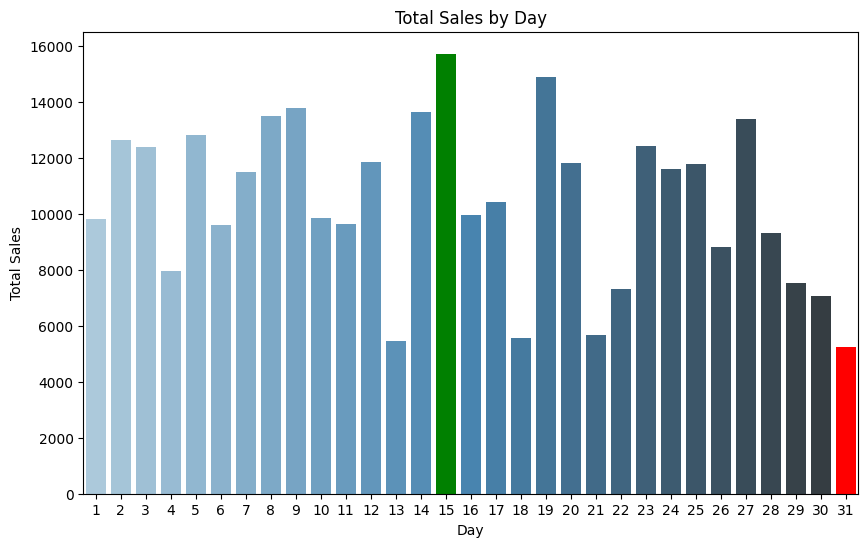

In [15]:
# Convert daily_sales to a DataFrame for Seaborn
daily_sales_df = daily_sales.reset_index()
daily_sales_df.columns = ['Day', 'Total Sales']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day', y='Total Sales', data=daily_sales_df, palette='Blues_d')

# Highlight the day with the most sales
max_day_index = daily_sales_df[daily_sales_df['Day'] == max_sales_day].index[0]
bars = ax.patches
bars[max_day_index].set_facecolor('green')

# Highlight the day with the least sales
min_day_index = daily_sales_df[daily_sales_df['Day'] == min_sales_day].index[0]
bars[min_day_index].set_facecolor('red')


plt.title('Total Sales by Day')
plt.show()


#### Evaluating the contribution of Each Branch and City to Overall Sales

##### Branch Contribution

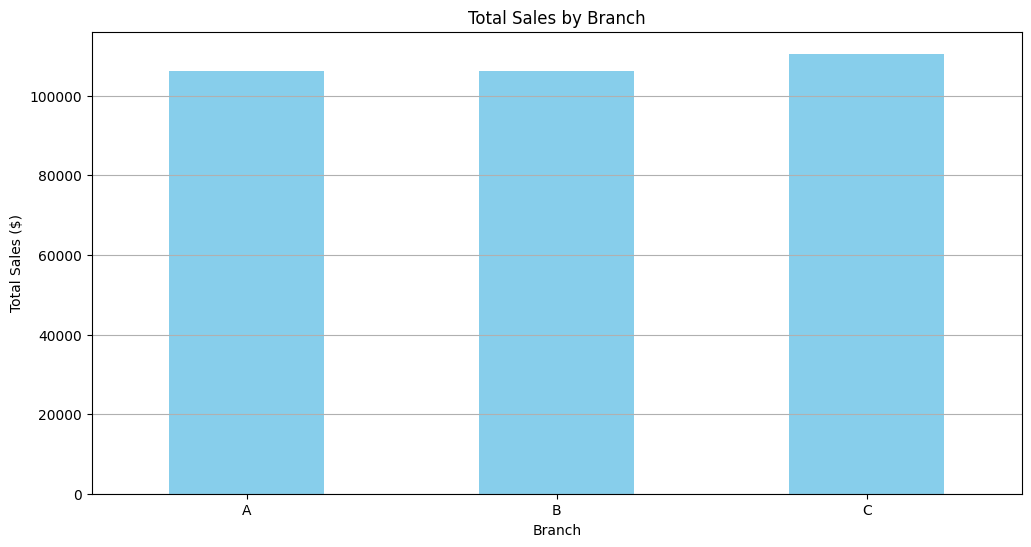

Branch
A    32.882757
B    32.881921
C    34.235322
Name: Total, dtype: float64


In [16]:
# Aggregate sales by Branch
branch_sales = df.groupby('Branch')['Total'].sum()

# Plotting the total sales by branch
plt.figure(figsize=(12, 6))
branch_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Branch') 
plt.ylabel('Total Sales ($)')
plt.xlabel('Branch')

# Rotate x-axis labels to make them upright and readable
plt.xticks(rotation=0) # Setting rotation to 0 degrees for upright labels

plt.grid(axis='y') # Show gridlines on the y-axis
plt.show()

# Branch contribution to total sales
total_sales = df['Total'].sum()
branch_contribution = (branch_sales / total_sales) * 100
print(branch_contribution)

##### City Contribution

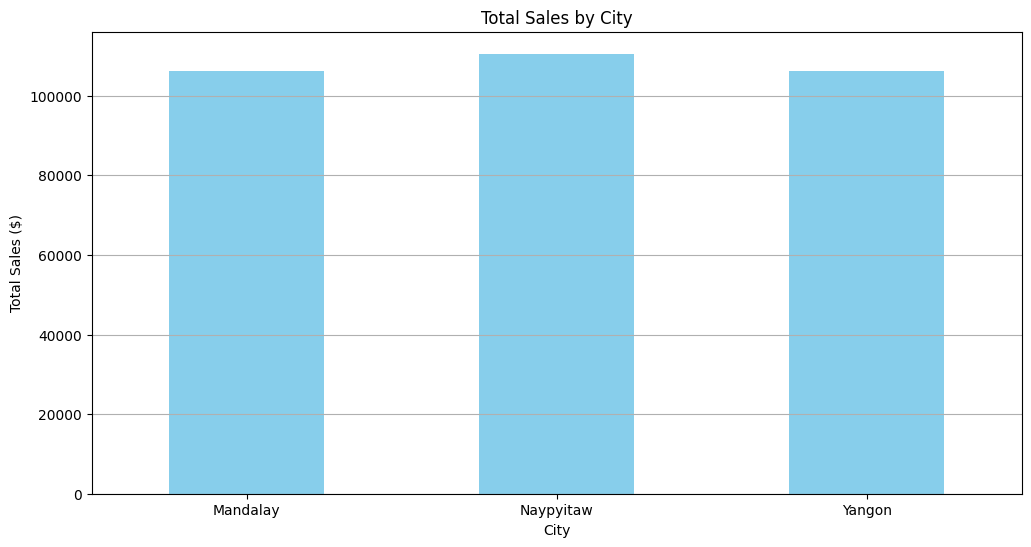

City
Mandalay     32.881921
Naypyitaw    34.235322
Yangon       32.882757
Name: Total, dtype: float64


In [17]:
# Sales by City
# Aggregate sales by City
city_sales = df.groupby('City')['Total'].sum()

# Plotting the total sales by City
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.ylabel('Total Sales ($)')
plt.xlabel('City')
plt.xticks(rotation=0) # Setting rotation to 0 degrees for upright labels
plt.grid(axis='y') # Show gridlines on the y-axis
plt.show()

# City contribution to total sales
city_contribution = (city_sales / total_sales) * 100
print(city_contribution)



#### Assesing the performance of product lines

##### Total sales and Quantities sold by product line

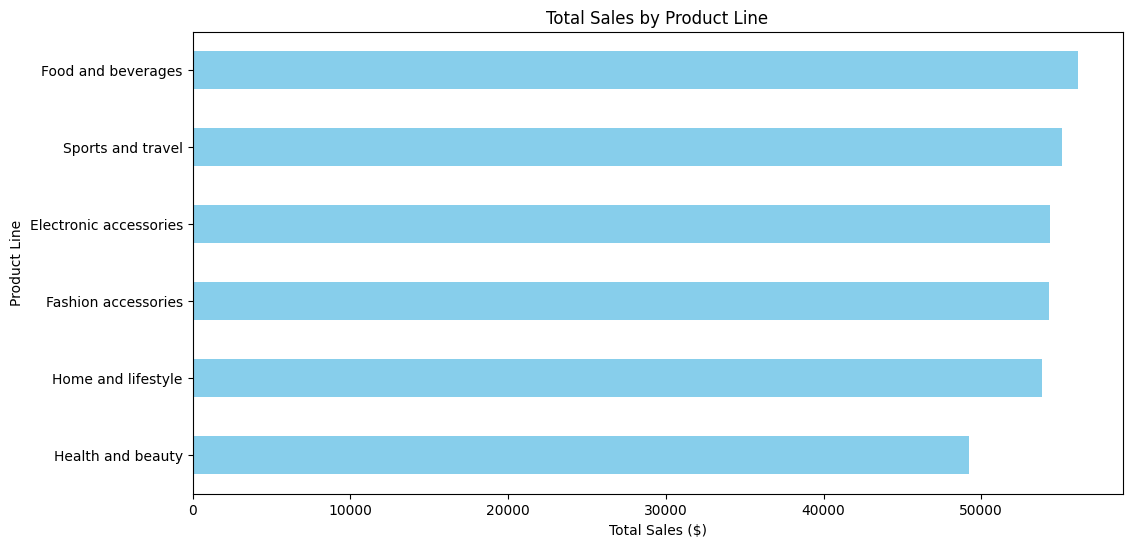

             Product line       Total
5      Food and beverages  56144.8440
4       Sports and travel  55122.8265
3  Electronic accessories  54337.5315
2     Fashion accessories  54305.8950
1      Home and lifestyle  53861.9130
0       Health and beauty  49193.7390


In [40]:
# Total sales by product line
# Aggregate sales by Product line
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=True)

# Plotting the total sales by Product line
plt.figure(figsize=(12, 6))
product_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Line')
plt.show()

# Printing the total sales by Product line
product_sales_df = product_sales.reset_index()
product_sales_df = product_sales_df.sort_values(by='Total', ascending=False)
print(product_sales_df)



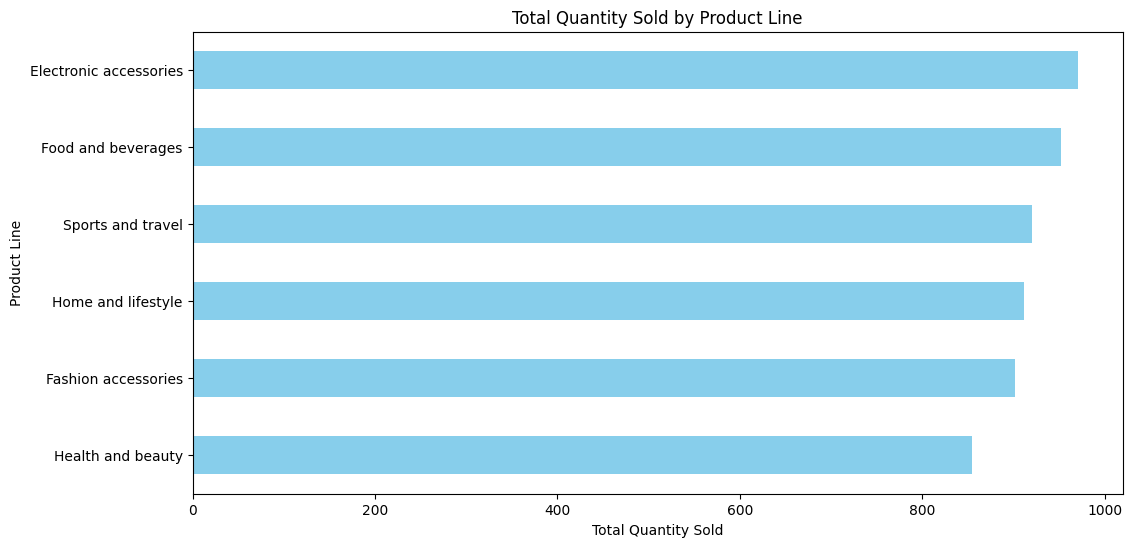

             Product line  Quantity
5  Electronic accessories       971
4      Food and beverages       952
3       Sports and travel       920
2      Home and lifestyle       911
1     Fashion accessories       902
0       Health and beauty       854


In [41]:
# Total quantity sold by product line

# Aggregate quantity sold by Product line
product_quantity = df.groupby('Product line')['Quantity'].sum().sort_values()

# Plotting the total quantity sold by Product line
plt.figure(figsize=(12, 6))
product_quantity.plot(kind='barh', color='skyblue')
plt.title('Total Quantity Sold by Product Line')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Line')
plt.show()

# Printing the total quantity sold by Product line
product_quantity_df = product_quantity.reset_index()
product_quantity_df = product_quantity_df.sort_values(by='Quantity', ascending=False)
print(product_quantity_df)



##### Identify the top performing and underperforming product lines

In [28]:
# Top performing product lines by total sales
top_product_line_sales = product_sales.idxmax()
top_product_sales = product_sales.max()
print(f"The top performing product line by total sales is {top_product_line_sales} with total sales of ${top_product_sales}")

The top performing product line by total sales is Food and beverages with total sales of $56144.844


In [42]:
# Underperforming product lines by total sales
underperforming_product_line_sales = product_sales.idxmin()
underperforming_product_sales = product_sales.min()
print(f"The underperforming product line by total sales is {underperforming_product_line_sales} with total sales of ${underperforming_product_sales}")


The underperforming product line by total sales is Health and beauty with total sales of $49193.739


In [45]:
# Comparing the Quantity Sold and Total Sales by Product Line
comparison_df = pd.DataFrame({'Total Sales': product_sales, 'Total Quantity Sold': product_quantity})

# Displaying the comparison
print(comparison_df)

                        Total Sales  Total Quantity Sold
Product line                                            
Electronic accessories   54337.5315                  971
Fashion accessories      54305.8950                  902
Food and beverages       56144.8440                  952
Health and beauty        49193.7390                  854
Home and lifestyle       53861.9130                  911
Sports and travel        55122.8265                  920


##### Customer Preferences by Gender

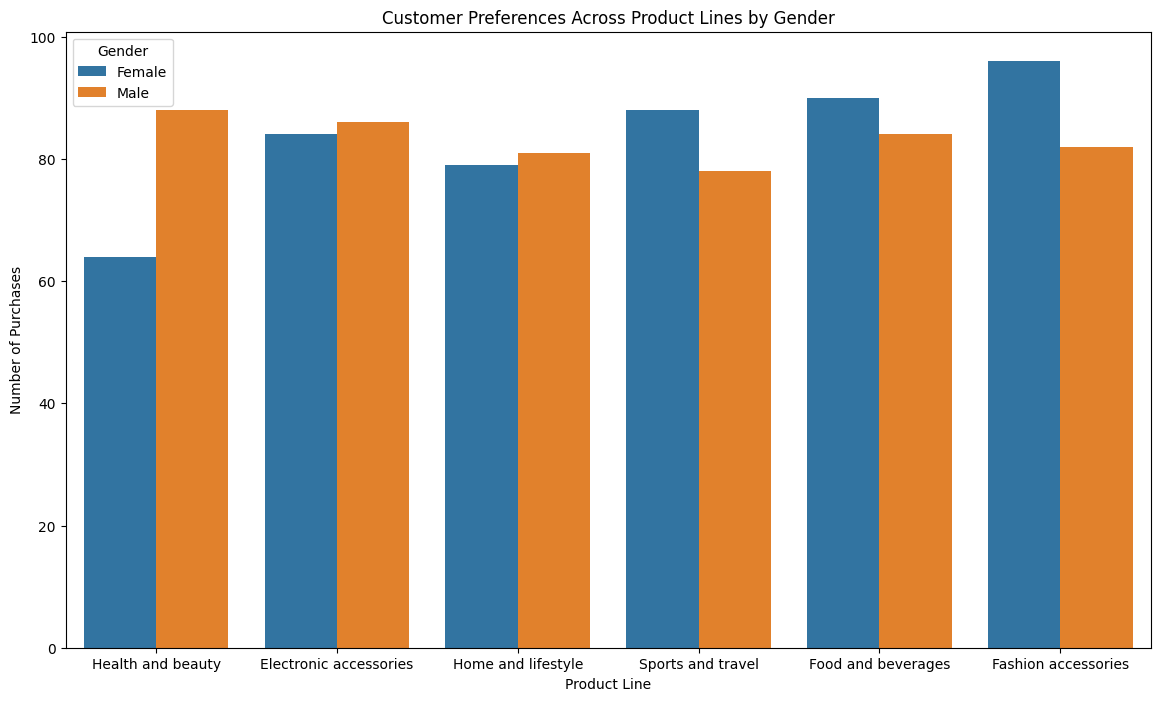

In [46]:
# Plot customer preferences by gender across product lines
plt.figure(figsize=(14, 8))
sns.countplot(x='Product line', hue='Gender', data=df)
plt.title('Customer Preferences Across Product Lines by Gender')
plt.xlabel('Product Line')
plt.ylabel('Number of Purchases')
plt.show()


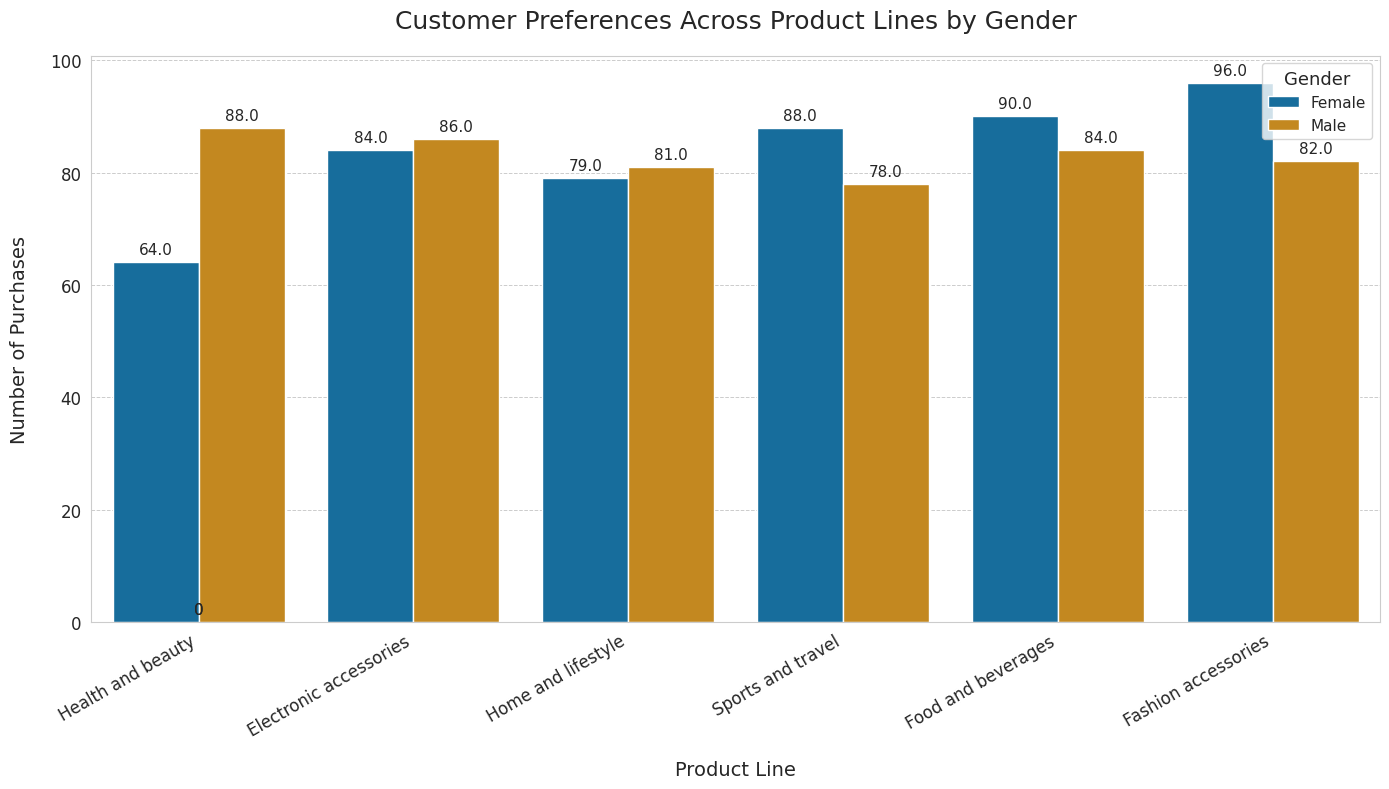

In [48]:
# Set the style and a colorblind-friendly palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Product line', hue='Gender', data=df)

# Add title and axis labels with larger fonts
plt.title('Customer Preferences Across Product Lines by Gender', fontsize=18, pad=20)
plt.xlabel('Product Line', fontsize=14, labelpad=15)
plt.ylabel('Number of Purchases', fontsize=14, labelpad=15)

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', 
                fontsize=11)

# Adjust the legend position and style
plt.legend(title='Gender', title_fontsize='13', loc='upper right', fontsize='11')

# Add gridlines only on the y-axis for clarity
ax.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

##### Customer preferences by payment method

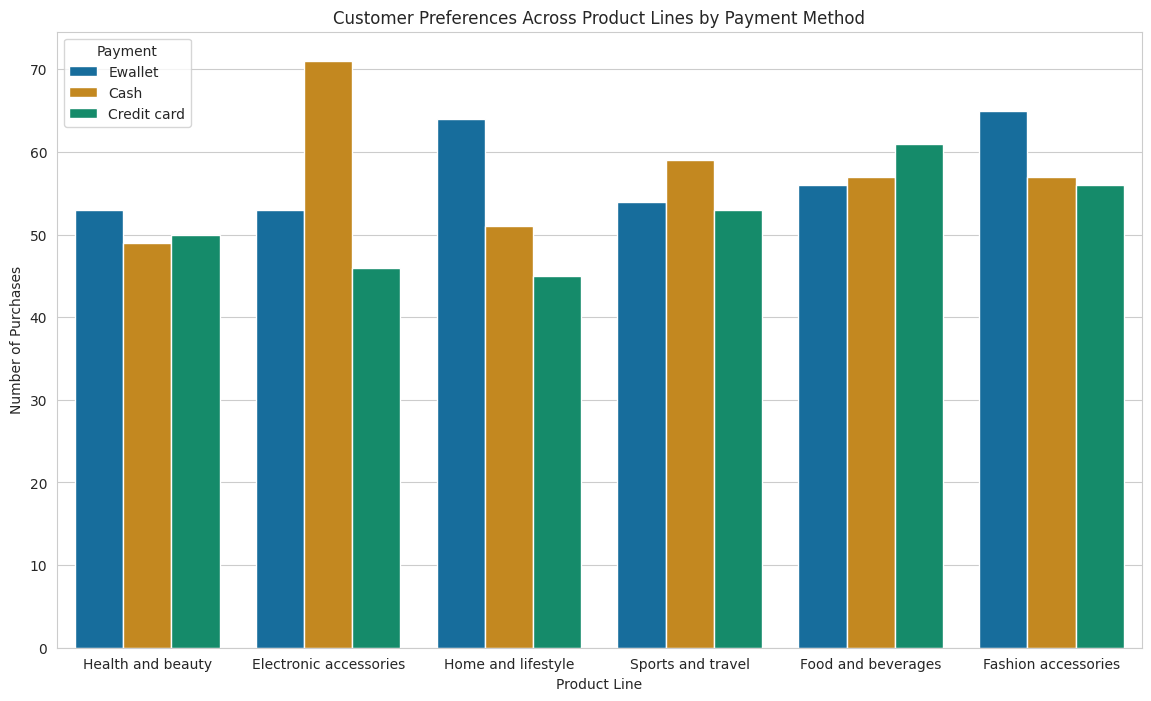

In [49]:
# Plot customer preferences by payment method across product lines
plt.figure(figsize=(14, 8))
sns.countplot(x='Product line', hue='Payment', data=df)
plt.title('Customer Preferences Across Product Lines by Payment Method')
plt.xlabel('Product Line')
plt.ylabel('Number of Purchases')
plt.show()


#### Customer Demographics

##### Customer Demographics Distribution

In [51]:
# Gender distribution
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Customer type distribution
customer_type_distribution = df['Customer type'].value_counts()
print(customer_type_distribution)


Gender
Female    501
Male      499
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64


##### Purchasing Patterns by Gender and Customer Type

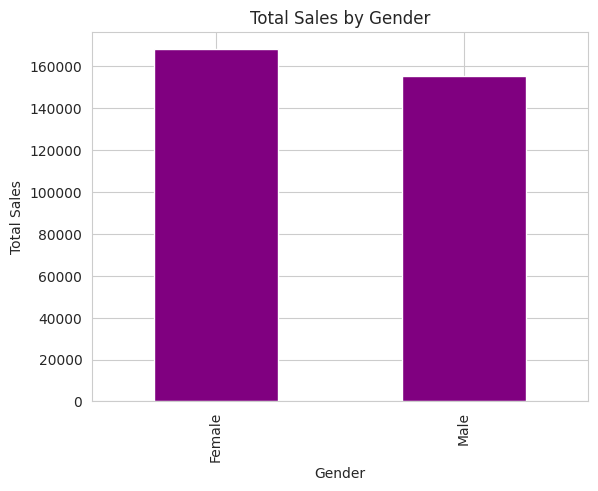

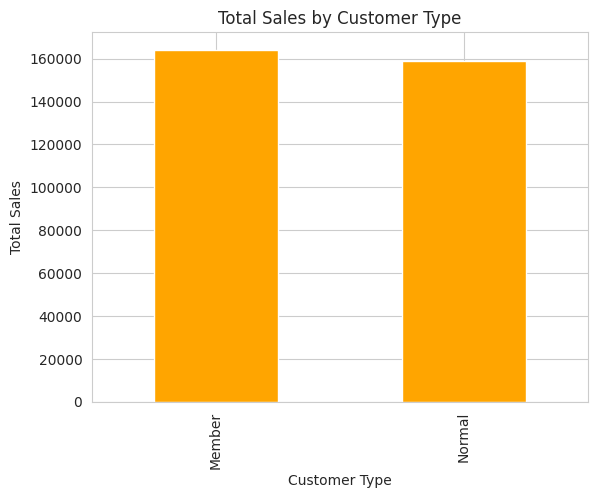

In [52]:
# Sales by gender
sales_by_gender = df.groupby('Gender')['Total'].sum()
sales_by_gender.plot(kind='bar', color='purple')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

# Sales by customer type
sales_by_customer_type = df.groupby('Customer type')['Total'].sum()
sales_by_customer_type.plot(kind='bar', color='orange')
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()


#### Payment Methods Analysis

##### Distribution of Payment Methods

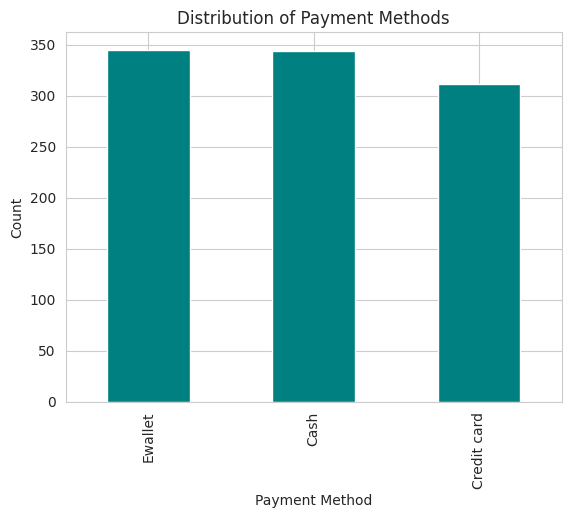

In [57]:
# Payment method distribution
payment_distribution = df['Payment'].value_counts()
payment_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


##### Correlation Between Payment Methods and Demographics

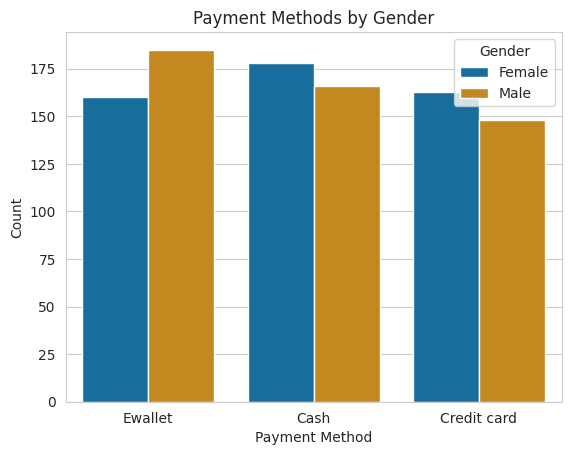

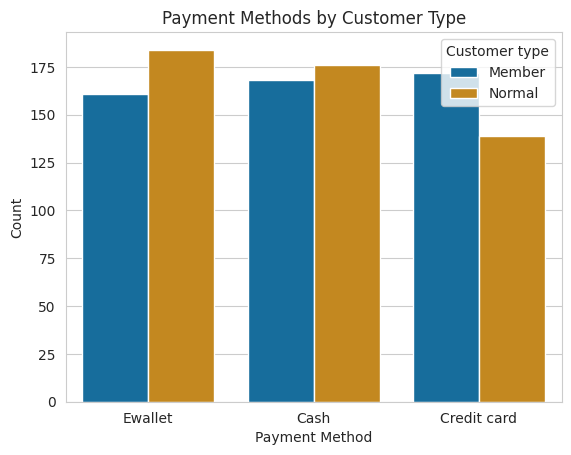

In [58]:
# Payment methods by gender
sns.countplot(x='Payment', hue='Gender', data=df)
plt.title('Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# Payment methods by customer type
sns.countplot(x='Payment', hue='Customer type', data=df)
plt.title('Payment Methods by Customer Type')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


##### Impact of Payment Methods on Sales

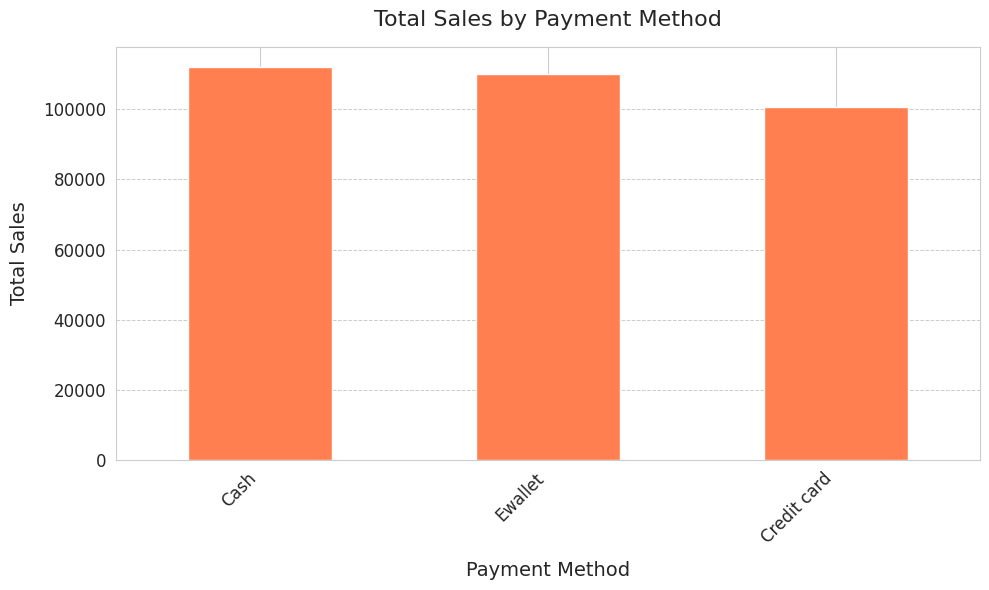

In [63]:
# Aggregate sales by Payment method and sort in descending order
sales_by_payment_method = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)

# Sales by payment method
plt.figure(figsize=(10, 6))
sales_by_payment_method.plot(kind='bar', color='coral')
plt.title('Total Sales by Payment Method', fontsize=16, pad=15)
plt.xlabel('Payment Method', fontsize=14, labelpad=10)
plt.ylabel('Total Sales', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()